In [3]:
!pip install git+https://github.com/colomemaria/epiScanpy

  Cloning https://github.com/colomemaria/epiScanpy to c:\users\genev\appdata\local\temp\pip-req-build-7j4_qkdz
  Resolved https://github.com/colomemaria/epiScanpy to commit 6190edf8d5fde1fd84633bb60d5bcfb0cb0efc73
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for episcanpy: filename=episcanpy-0.4.0+12.g6190edf-py3-none-any.whl size=137232 sha256=9cac3d7060f6afaa145d6d4cc38f99e926172e864842cb09dc7e66b16267479a
  Stored in directory: C:\Users\genev\AppData\Local\Temp\pip-ephem-wheel-cache-m8k3to1v\wheels\f4\e0\c6\ee06e5be517fed7737b71747ff696c74ef673bdfd3d8d35bd7
Successfully built episcanpy
  Attempting uninstall: episcanpy
    Found existing installation: episcanpy 0.4.0
    Uninstalling episcanpy-0.4.0:
      Successfully uninstalled episcanpy-0.4.0


  Running command git clone --filter=blob:none --quiet https://github.com/colomemaria/epiScanpy 'C:\Users\genev\AppData\Local\Temp\pip-req-build-7j4_qkdz'


In [4]:
# Imports
# -------
import episcanpy as epi, scanpy as sc, anndata as ad
import numpy as np, pandas as pd
import warnings; warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')

In [5]:
# ----------------
# Loading the Data
# ----------------
adata = ad.read('./data_tutorial_buenrostro/all_buenrostro_bulk_peaks.h5ad')
adata

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './data_tutorial_buenrostro/all_buenrostro_bulk_peaks.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
display(adata.obs)

batch  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....     0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...     0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam      0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam           0   
...                                                  ...   
BM1077-LMPP-Frozen-160107-40.dedup.st.bam              1   
BM1077-MPP-Frozen-160105-74.dedup.st.bam               1   
singles-BM1214-GMP-160421-9.dedup.st.bam               1   
singles-BM0828-LMPP-frozen-151105-62.dedup.st.bam      1   
singles-BM0828-MEP-160420-43.dedup.st.bam              1   

                                                                                         cell_name  
BM1077-MPP-Frozen-160105-1.dedup.st.bam                                 BM1077-MPP-Frozen-160105-1  
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....  singles-20160726-scATAC-BM1137-GMP3high-HYC-88  
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...      singles-160808-scATAC-BM1137-GMP2mid-LS-65  
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam             singles-BM0828-LMPP-frozen-151105-20  
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                       singles-160819-BM1137-CMP-LS-95  
...                                                                                            ...  
BM1077-LMPP-Frozen-160107-40.dedup.st.bam                             BM1077-LMPP-Frozen-160107-40  
BM1077-MPP-Frozen-160105-74.dedup.st.bam                               BM1077-MPP-Frozen-160105-74  
singles-BM1214-GMP-160421-9.dedup.st.bam                               singles-BM1214-GMP-160421-9  
singles-BM0828-LMPP-frozen-151105-62.dedup.st.bam             singles-BM0828-LMPP-frozen-151105-62  
singles-BM0828-MEP-160420-43.dedup.st.bam                             singles-BM0828-MEP-160420-43  

[2034 rows x 2 columns]

In [6]:
display(adata.var)

Empty DataFrame
Columns: []
Index: [chr1_10279_10779, chr1_13252_13752, chr1_16019_16519, chr1_29026_29526, chr1_96364_96864, chr1_115440_115940, chr1_237535_238035, chr1_240811_241311, chr1_540469_540969, chr1_713909_714409, chr1_752503_753003, chr1_762546_763046, chr1_773631_774131, chr1_778115_778615, chr1_779604_780104, chr1_791908_792408, chr1_793334_793834, chr1_794055_794555, chr1_800952_801452, chr1_805097_805597, chr1_826009_826509, chr1_832576_833076, chr1_833996_834496, chr1_839080_839580, chr1_839870_840370, chr1_840445_840945, chr1_841428_841928, chr1_842012_842512, chr1_845328_845828, chr1_845891_846391, chr1_846454_846954, chr1_847992_848492, chr1_848535_849035, chr1_849193_849693, chr1_851918_852418, chr1_853786_854286, chr1_855801_856301, chr1_856315_856815, chr1_857398_857898, chr1_859019_859519, chr1_860034_860534, chr1_860754_861254, chr1_861662_862162, chr1_862489_862989, chr1_864190_864690, chr1_865618_866118, chr1_867626_868126, chr1_868448_868948, chr1_870745_871245, chr1_873409_873909, chr1_874097_874597, chr1_875099_875599, chr1_875613_876113, chr1_876214_876714, chr1_876748_877248, chr1_877485_877985, chr1_878123_878623, chr1_878881_879381, chr1_881182_881682, chr1_890790_891290, chr1_894382_894882, chr1_895007_895507, chr1_895777_896277, chr1_896421_896921, chr1_897999_898499, chr1_898597_899097, chr1_899207_899707, chr1_901644_902144, chr1_902147_902647, chr1_903292_903792, chr1_908549_909049, chr1_909603_910103, chr1_911303_911803, chr1_914689_915189, chr1_915884_916384, chr1_916707_917207, chr1_918995_919495, chr1_919502_920002, chr1_932578_933078, chr1_933235_933735, chr1_934321_934821, chr1_935345_935845, chr1_936000_936500, chr1_937054_937554, chr1_938691_939191, chr1_939778_940278, chr1_940319_940819, chr1_944300_944800, chr1_948590_949090, chr1_949597_950097, chr1_950156_950656, chr1_950699_951199, chr1_952556_953056, chr1_954750_955250, chr1_955293_955793, chr1_955799_956299, chr1_956313_956813, chr1_956815_957315, chr1_958023_958523, chr1_959020_959520, ...]

[491436 rows x 0 columns]

In [7]:
df = adata.to_df()
df.head()

index                                               chr1_10279_10779  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                          0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....               0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...               0.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                     0.0   

index                                               chr1_13252_13752  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                          0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....               0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...               1.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                     0.0   

index                                               chr1_16019_16519  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                          0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....               0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...               0.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                     0.0   

index                                               chr1_29026_29526  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                          0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....               0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...               0.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                     0.0   

index                                               chr1_96364_96864  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                          0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....               1.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...               0.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                     0.0   

index                                               chr1_115440_115940  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                            0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....                 0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...                 1.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                  0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                       0.0   

index                                               chr1_237535_238035  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                            0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....                 0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...                 0.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                  0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                       0.0   

index                                               chr1_240811_241311  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                            0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....                 0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...                 0.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                  0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                       0.0   

index                                               chr1_540469_540969  \
BM1077-MPP-Frozen-160105-1.dedup.st.bam                            0.0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88....                 0.0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65.dedu...                 0.0   
singles-BM0828-LMPP-frozen-151105-20.dedup.st.bam                  0.0   
singles-160819-BM1137-CMP-LS-95.dedup.st.bam                       0.0   

index                                               chr

In [8]:
# Extract the FACs information from the file names
# 

adata.obs['facs_label'] = ['MEP' if 'MEP' in line else line.split('.bam')[0].lstrip('singles-').split('BM')[-1].split('-')[1] for line in adata.obs['cell_name'].tolist()]
adata

AnnData object with n_obs × n_vars = 2034 × 491436
    obs: 'batch', 'cell_name', 'facs_label'

In [9]:
# loading Additional Metadata
# 

#!head './data_tutorial_buenrostro/metadata.tsv'

# format the cell names to match the metadata file
adata.obs_names = [x.split('/')[-1].split('.dedup.st.bam')[0] for x in adata.obs_names.tolist()]
adata.obs_names

Index(['BM1077-MPP-Frozen-160105-1',
       'singles-20160726-scATAC-BM1137-GMP3high-HYC-88',
       'singles-160808-scATAC-BM1137-GMP2mid-LS-65',
       'singles-BM0828-LMPP-frozen-151105-20',
       'singles-160819-BM1137-CMP-LS-95', 'BM1077-MPP-Frozen-160105-36',
       'singles-20160726-scATAC-BM1214-CMP-LS-84',
       'BM1077-CMP-Frozen-160106-21', 'singles-BM0106-HSC-SIM-160219-36',
       'singles-BM1214-GMP-160421-60',
       ...
       'singles-160822-BM1137-CMP-LS-91',
       'singles-BM0828-CMP-frozen-151118-69',
       'singles-20160617-scATAC-BM1214-CMP-LS-40',
       'singles-BM0828-GMP-151027-2',
       'singles-20160726-scATAC-BM1214-CMP-LS-19',
       'BM1077-LMPP-Frozen-160107-40', 'BM1077-MPP-Frozen-160105-74',
       'singles-BM1214-GMP-160421-9', 'singles-BM0828-LMPP-frozen-151105-62',
       'singles-BM0828-MEP-160420-43'],
      dtype='object', length=2034)

In [10]:
# Loading the metadata to the anndata object
# ------------------------------------------
epi.pp.load_metadata(adata,
                     './data_tutorial_buenrostro/metadata.tsv',
                     separator='\t')
adata

AnnData object with n_obs × n_vars = 2034 × 491436
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type'

In [11]:
display(adata.obs)
display(adata.var_names)

batch  \
BM1077-MPP-Frozen-160105-1                         0   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88     0   
singles-160808-scATAC-BM1137-GMP2mid-LS-65         0   
singles-BM0828-LMPP-frozen-151105-20               0   
singles-160819-BM1137-CMP-LS-95                    0   
...                                              ...   
BM1077-LMPP-Frozen-160107-40                       1   
BM1077-MPP-Frozen-160105-74                        1   
singles-BM1214-GMP-160421-9                        1   
singles-BM0828-LMPP-frozen-151105-62               1   
singles-BM0828-MEP-160420-43                       1   

                                                                                     cell_name  \
BM1077-MPP-Frozen-160105-1                                          BM1077-MPP-Frozen-160105-1   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88  singles-20160726-scATAC-BM1137-GMP3high-HYC-88   
singles-160808-scATAC-BM1137-GMP2mid-LS-65          singles-160808-scATAC-BM1137-GMP2mid-LS-65   
singles-BM0828-LMPP-frozen-151105-20                      singles-BM0828-LMPP-frozen-151105-20   
singles-160819-BM1137-CMP-LS-95                                singles-160819-BM1137-CMP-LS-95   
...                                                                                        ...   
BM1077-LMPP-Frozen-160107-40                                      BM1077-LMPP-Frozen-160107-40   
BM1077-MPP-Frozen-160105-74                                        BM1077-MPP-Frozen-160105-74   
singles-BM1214-GMP-160421-9                                        singles-BM1214-GMP-160421-9   
singles-BM0828-LMPP-frozen-151105-62                      singles-BM0828-LMPP-frozen-151105-62   
singles-BM0828-MEP-160420-43                                      singles-BM0828-MEP-160420-43   

                                               facs_label  \
BM1077-MPP-Frozen-160105-1                            MPP   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88   GMP3high   
singles-160808-scATAC-BM1137-GMP2mid-LS-65        GMP2mid   
singles-BM0828-LMPP-frozen-151105-20                 LMPP   
singles-160819-BM1137-CMP-LS-95                       CMP   
...                                                   ...   
BM1077-LMPP-Frozen-160107-40                         LMPP   
BM1077-MPP-Frozen-160105-74                           MPP   
singles-BM1214-GMP-160421-9                           GMP   
singles-BM0828-LMPP-frozen-151105-62                 LMPP   
singles-BM0828-MEP-160420-43                          MEP   

                                                                                         label  \
BM1077-MPP-Frozen-160105-1                                          BM1077-MPP-Frozen-160105-1   
singles-20160726-scATAC-BM1137-GMP3high-HYC-88  singles-20160726-scATAC-BM1137-GMP3high-HYC-88   
singles-160808-scATAC-BM1137-GMP2mid-LS-65          singles-160808-scATAC-BM1137-GMP2mid-LS-65   
singles-BM0828-LMPP-frozen-151105-20                      singles-BM0828-LMPP-frozen-151105-20   
singles-160819-BM1137-CMP-LS-95                                singles-160819-BM1137-CMP-LS-95   
...                                                                                        ...   
BM1077-LMPP-Frozen-160107-40                                      BM1077-LMPP-Frozen-160107-40   
BM1077-MPP-Frozen-160105-74                                        BM1077-MPP-Frozen-160105-74   
singles-BM1214-GMP-160421-9                                        singles-BM1214-GMP-160421-9   
singles-BM0828-LMPP-frozen-151105-62                      singles-BM0828-LMPP-frozen-151105-62   
singles-BM0828-MEP-160420-43                                      singles-BM0828-MEP-160420-43   

                                               cell_type  
BM1077-MPP-Frozen-160105-1                           MPP  
singles-20160726-scATAC-BM1137-GMP3high-HYC-88       GMP  
singles-160808-scATAC-BM1137-GMP2mid-LS-65           GMP  
singles-BM0828-LMPP-frozen-151105-20               

Index(['chr1_10279_10779', 'chr1_13252_13752', 'chr1_16019_16519',
       'chr1_29026_29526', 'chr1_96364_96864', 'chr1_115440_115940',
       'chr1_237535_238035', 'chr1_240811_241311', 'chr1_540469_540969',
       'chr1_713909_714409',
       ...
       'chrX_154822578_154823078', 'chrX_154840821_154841321',
       'chrX_154841449_154841949', 'chrX_154841956_154842456',
       'chrX_154842517_154843017', 'chrX_154862057_154862557',
       'chrX_154870909_154871409', 'chrX_154880741_154881241',
       'chrX_154891824_154892324', 'chrX_154896342_154896842'],
      dtype='object', name='index', length=491436)

In [13]:
# adata.obs['cell_type'] = [x.rstrip('\n') for x in adata.obs['cell_type\n']]

In [14]:
#del adata.obs['cell_type\n'] 

In [15]:
adata

AnnData object with n_obs × n_vars = 2034 × 491436
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type'

In [16]:
# check the 2 different annotation obtained
pd.crosstab(adata.obs['cell_type'], adata.obs['facs_label'])

facs_label  CLP  CMP  GMP  GMP1low  GMP2mid  GMP3high  HSC  LMPP  MCP  MEP  \
cell_type                                                                    
CLP          78    0    0        0        0         0    0     0    0    0   
CMP           0  502    0        0        0         0    0     0    0    0   
GMP           0    0  216       68       44        74    0     0    0    0   
HSC           0    0    0        0        0         0  347     0    0    0   
LMPP          0    0    0        0        0         0    0   160    0    0   
MEP           0    0    0        0        0         0    0     0    0  138   
MPP           0    0    0        0        0         0    0     0    0    0   
UNK           0    0    0        0        0         0    0     0    0    0   
mono          0    0    0        0        0         0    0     0    0    0   
pDC           0    0    0        0        0         0    0     0   73    0   

facs_label  MPP  UNK  mono  pDC  
cell_type                        
CLP           0    0     0    0  
CMP           0    0     0    0  
GMP           0    0     0    0  
HSC           0    0     0    0  
LMPP          0    0     0    0  
MEP           0    0     0    0  
MPP         142    0     0    0  
UNK           0   60     0    0  
mono          0    0    64    0  
pDC           0    0     0   68

----------------

### Loading gene/transcription annotation

----------------

In [17]:
# !wget ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_19/gencode.v19.annotation.gtf.gz -O data/data_tutorial_buenrostro/gencode.v19.annotation.gtf.gz
# !cd data/data_tutorial_buenrostro; gunzip gencode.v19.annotation.gtf

In [18]:
epi.tl.find_genes(adata,
                  gtf_file='gencode.v19.annotation.gtf_withproteinids',
                  #gtf_file='data/data_tutorial_buenrostro/gencode.v19.annotation.gtf',
                  key_added='transcript_annotation',
                  upstream=2000,
                  feature_type='transcript',
                  annotation='HAVANA',
                  raw=False)
adata

In [19]:
adata

AnnData object with n_obs × n_vars = 2034 × 491436
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type'
    var: 'transcript_annotation'

----------------

### Pre-Processing

----------------

In [21]:
# Check if the data matrix is binary - if not, binarize the data matrix
print(np.max(adata.X))
print(np.min(adata.X))


# # To Binarize the data, use sc.pp.binarize(adata)
# epi.pp.binarize(adata)
# print(np.max(adata.X))


1.0
0.0


#### Basic Filtering

-------------------

In [23]:
# remove any potential empty features or barcodes
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

adata

AnnData object with n_obs × n_vars = 2034 × 467226
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features'
    var: 'transcript_annotation', 'n_cells'

In [24]:
# We filtered out 24210 peaks

#### Quality Control

------------

In [25]:
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 2034 × 467226
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells'

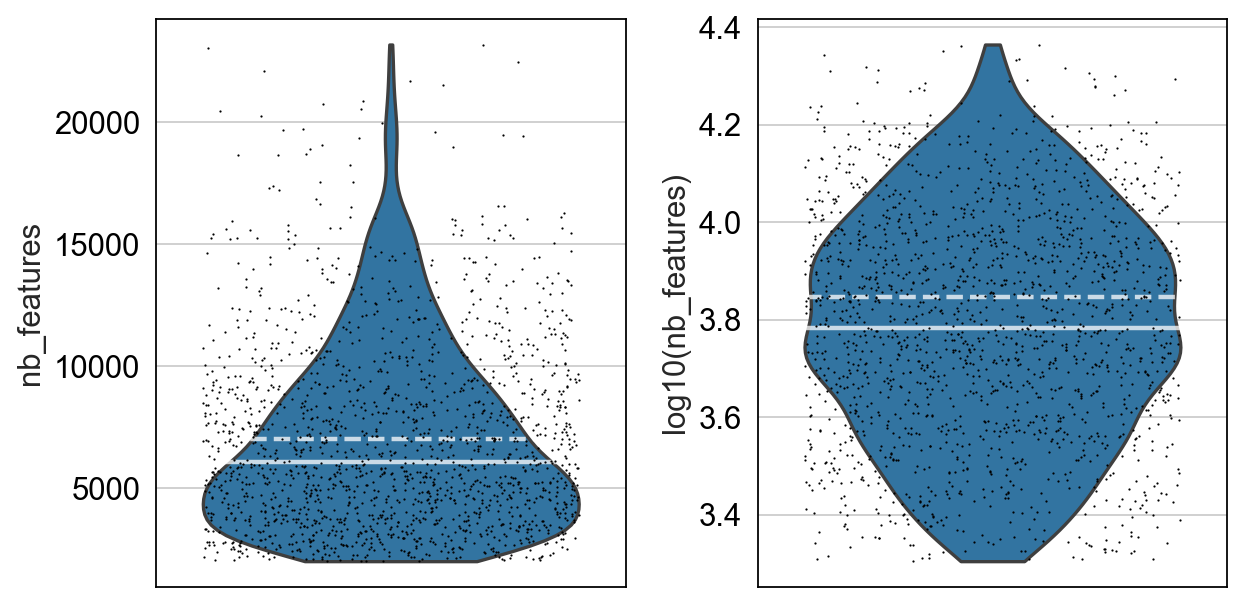

Max:	23175
Median:	6071.5
Mean:	7028.610917537747
Min:	2015


In [82]:
epi.pl.violin(adata, 'nb_features')
# epi.pl.violin(adata, ['log_nb_features'])

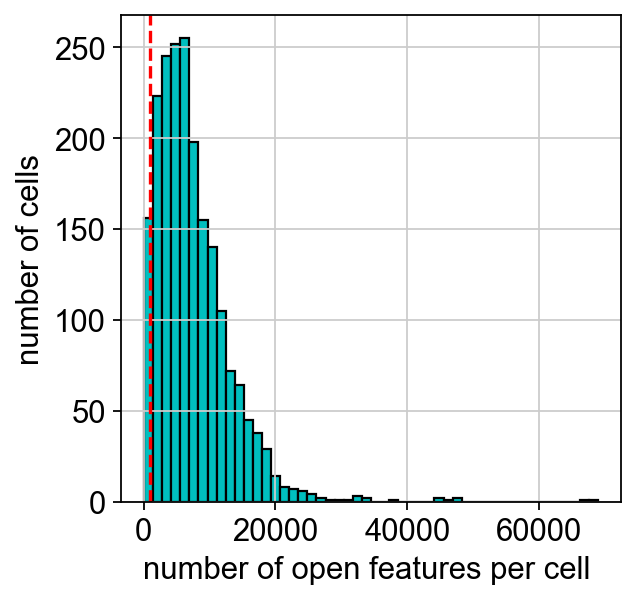

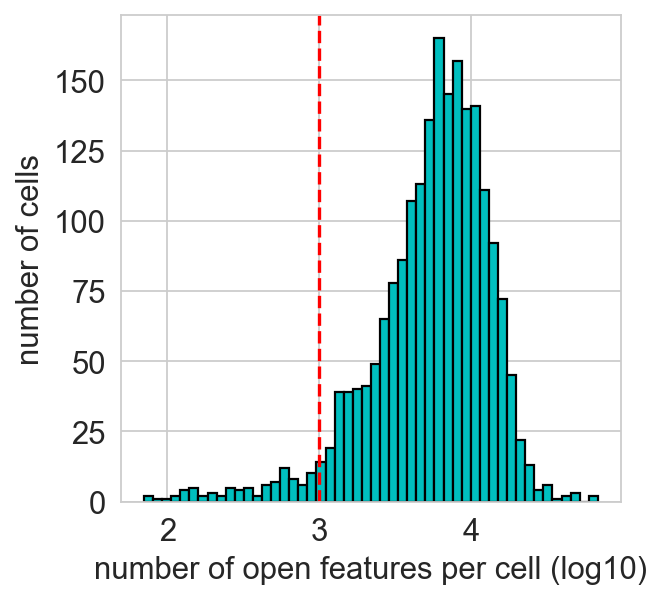

In [27]:
# set a minimum number of cells to keep 
min_features = 1000

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells.png')
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells_log10.png')

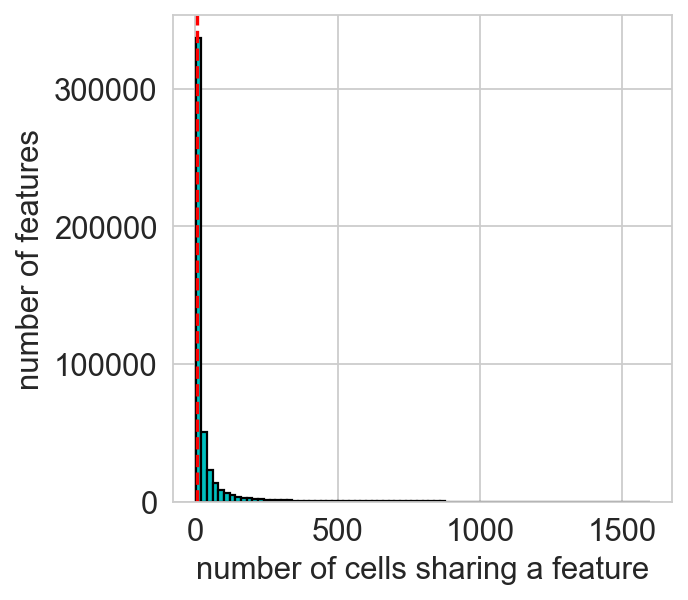

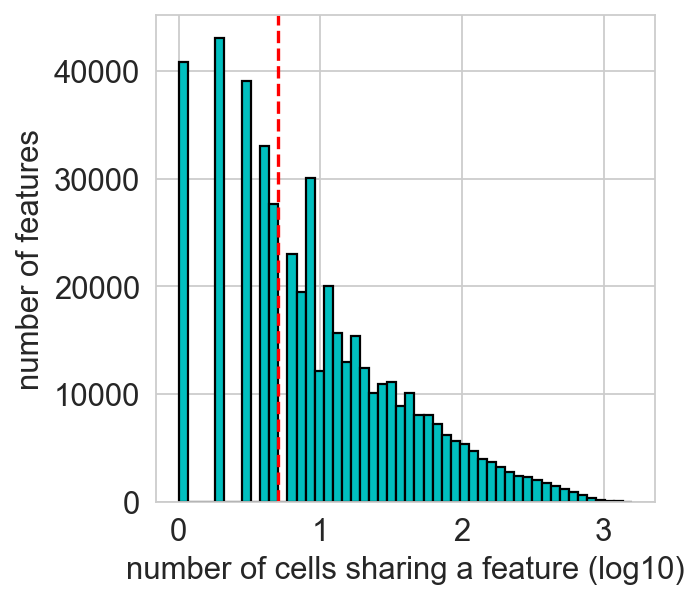

In [28]:
# minimum number of cells sharing a feature
min_cells = 5
epi.pp.coverage_features(adata, binary=True, log=False, 
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks.png')
epi.pp.coverage_features(adata, binary=True, log=True, 
                        threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks_log10.png')

#### Actually Filtering the Data

Filtering cells and peaks based on Quality Control Plots

----------

In [30]:
min_features = 1000
epi.pp.filter_cells(adata, min_features=min_features)
display(adata)
print("-------------------------------")
min_cells = 5
epi.pp.filter_features(adata, min_cells=min_cells)
display(adata)

AnnData object with n_obs × n_vars = 1944 × 311035
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness'

-------------------------------


AnnData object with n_obs × n_vars = 1944 × 311027
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness'

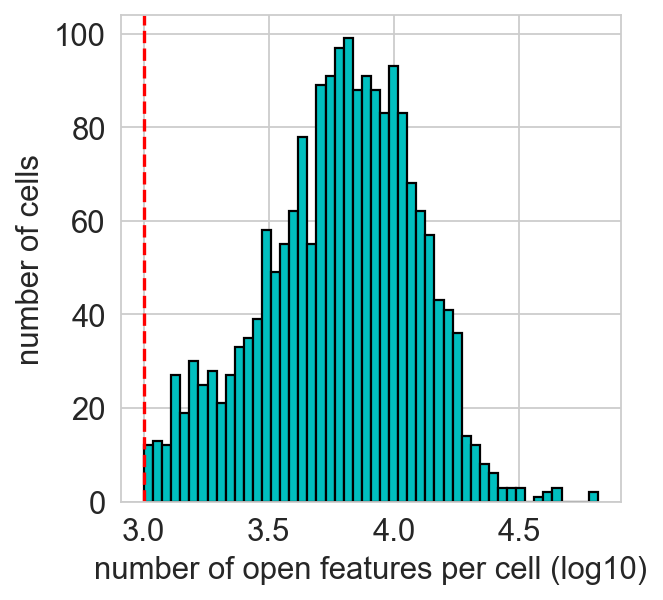

In [31]:
# Looking at QC Plots after filtering
# -----------------------------------

epi.pp.coverage_cells(adata, 
                      binary=True, 
                      log='log10', 
                      bins=50, 
                      threshold=min_features)

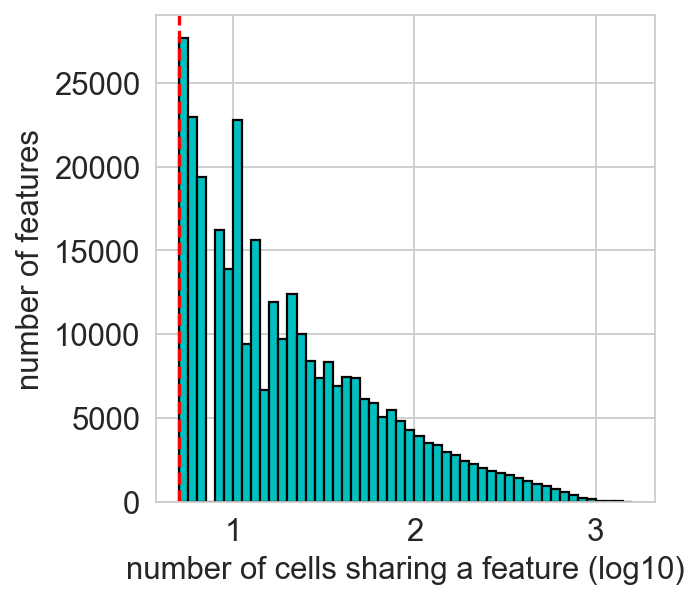

In [32]:
epi.pp.coverage_features(adata, 
                         binary=True, 
                         log='log10',
                         bins=50,
                         threshold=min_cells)

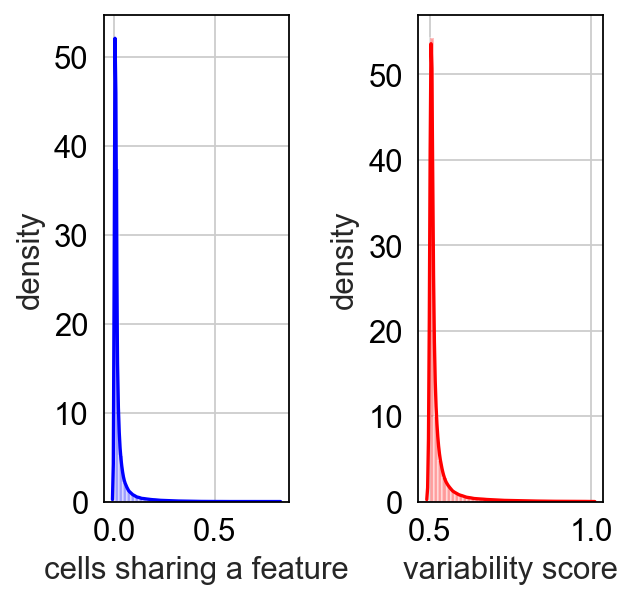

In [35]:
# Identifying the most variable features
# -------------------------------------
# We aim to select a cut-off after the elbow

epi.pp.cal_var(adata)

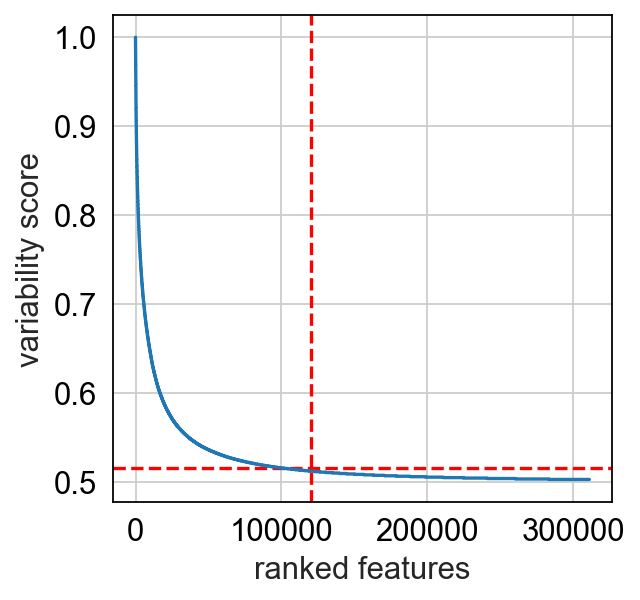

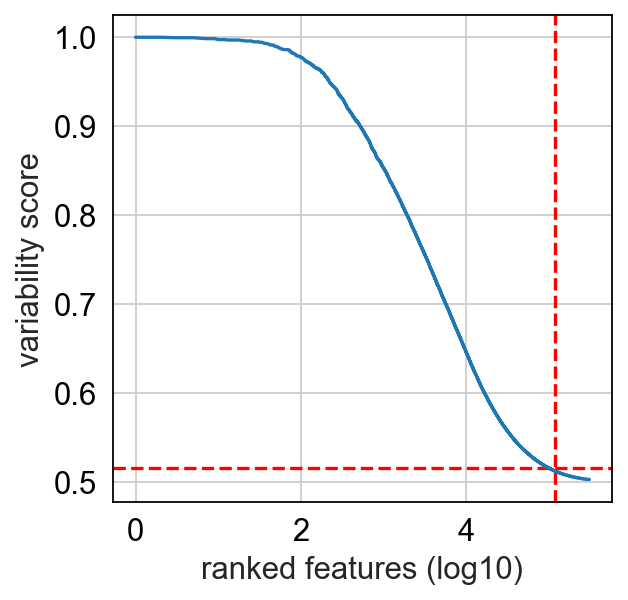

In [36]:
min_score_value = 0.515
nb_feature_selected = 120000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix.png')

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected,
                     save='variability_features_plot_bonemarrow_peakmatrix_log10.png')

In [37]:
# Saving the current matrix in raw layer
# 
adata.raw = adata

In [39]:
# create a new AnnData containing only the most variable features
# ---------------------------------------------------------------
adata = epi.pp.select_var_feature(adata,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)
adata

View of AnnData object with n_obs × n_vars = 1944 × 122505
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

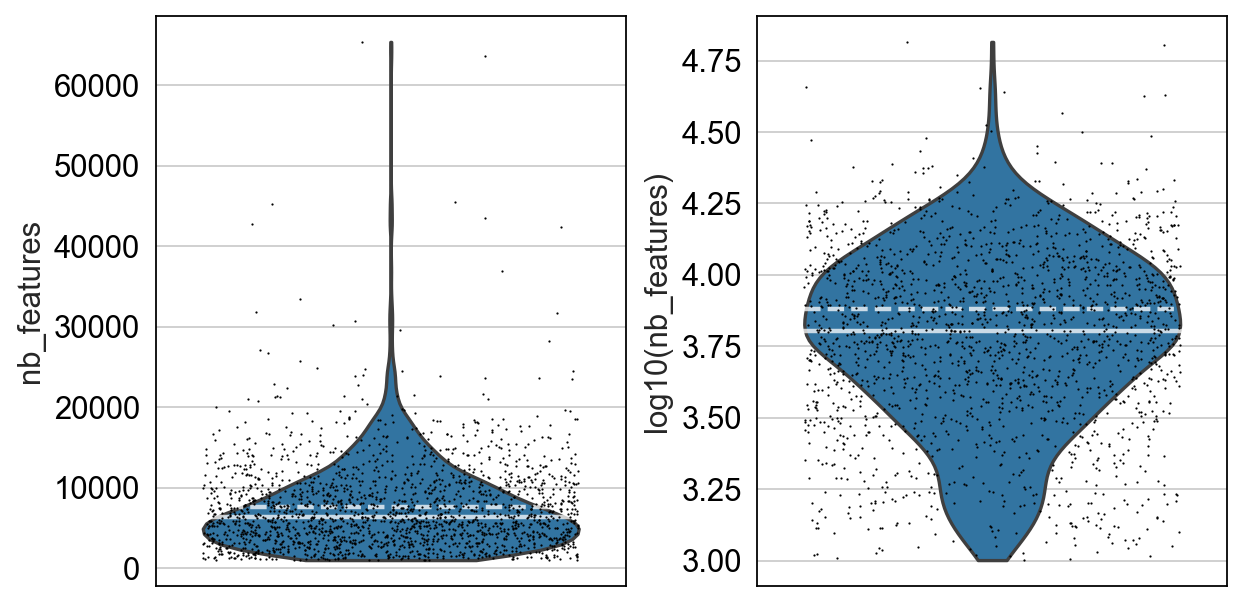

Max:	65391.0
Median:	6381.5
Mean:	7606.276748971193
Min:	1004.0


In [42]:
epi.pl.violin(adata, 'nb_features')
#epi.pl.violin(adata, 'log_nb_features')

In [43]:
adata

View of AnnData object with n_obs × n_vars = 1944 × 122505
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

In [45]:
# Filtering out information
epi.pp.filter_cells(adata, min_features=2000)
epi.pp.filter_cells(adata, max_features=25000)

adata

AnnData object with n_obs × n_vars = 1722 × 122505
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

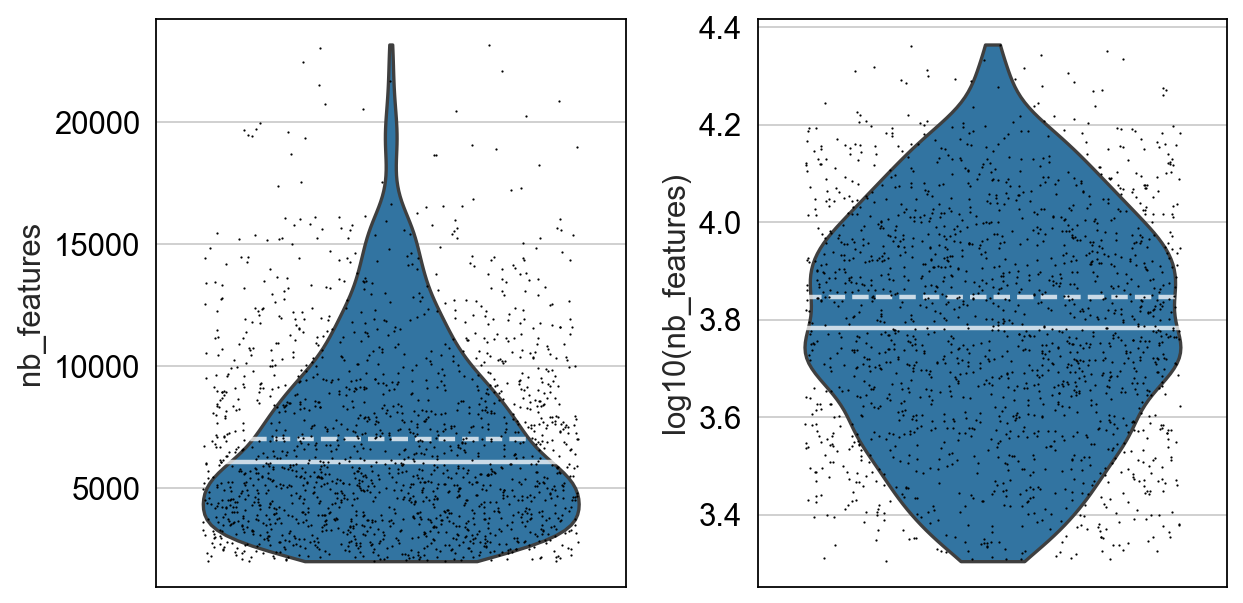

Max:	23175
Median:	6071.5
Mean:	7028.610917537747
Min:	2015


In [46]:
epi.pl.violin(adata, 'nb_features')

#### Normalization

--------------

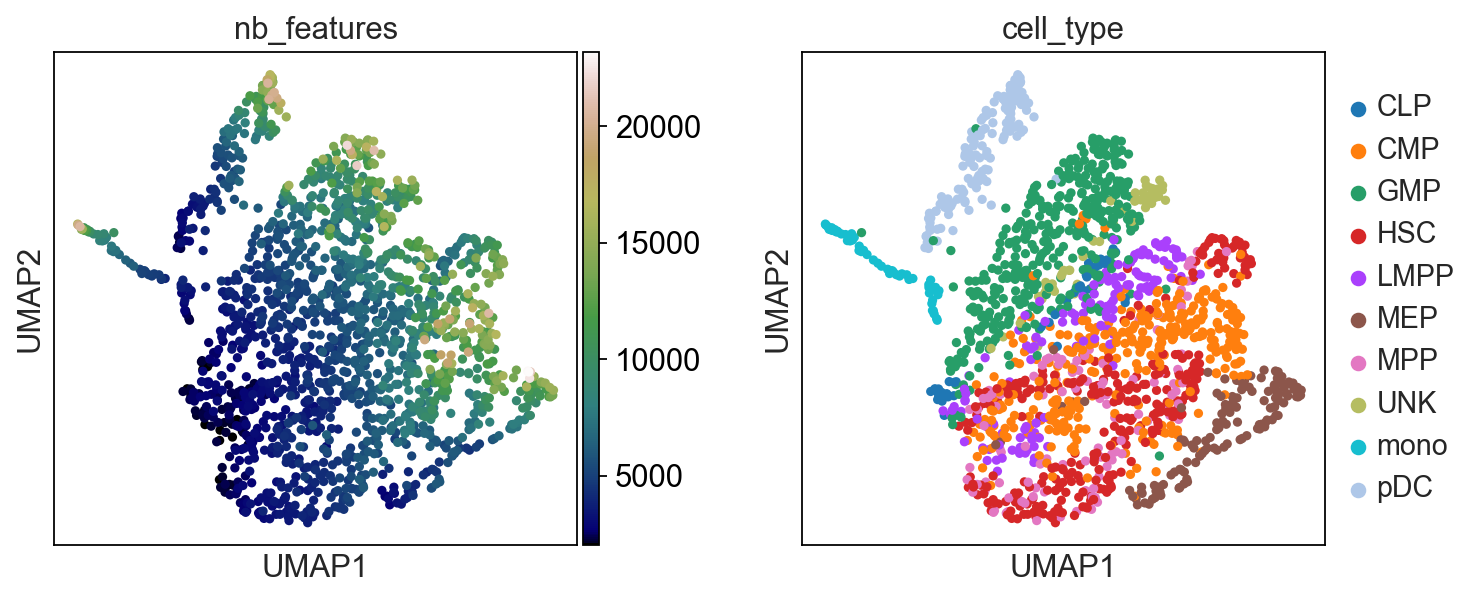

In [47]:
# Quick viz before normqlization
#  The lazy function compute PCA, neighbor graph umap and tsne embeddings.
epi.pp.lazy(adata)
sc.pl.umap(adata, color=['nb_features', 'cell_type'], wspace=0.3)

In [48]:
# save the current version of the matrix (binary, not normalised) in a layer of the Anndata.
adata.layers['binary'] = adata.X.copy()

#### Library Size Correction

--------------------

In [49]:
epi.pp.normalize_total(adata)

In [50]:
# save the current version of the matrix (normalised) in a layer of the Anndata.
adata.layers['normalised'] = adata.X.copy()
adata

AnnData object with n_obs × n_vars = 1722 × 122505
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'tsne', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'distances', 'connectivities'

#### Visualizing again!!

--------------

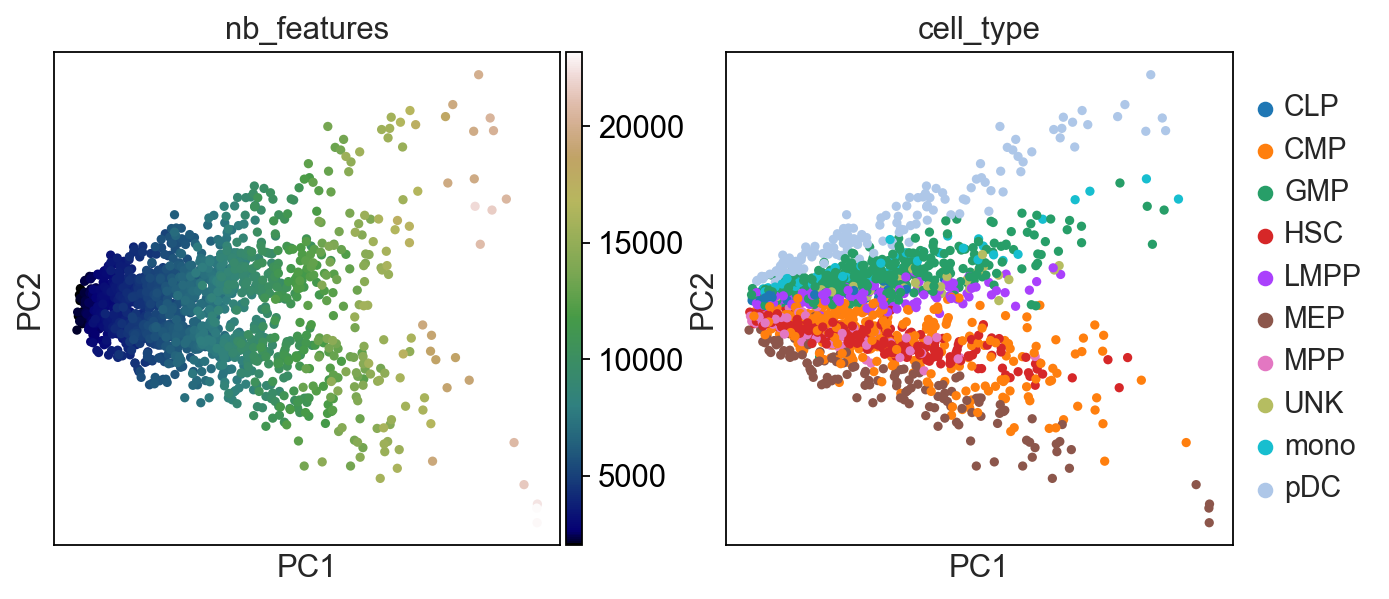

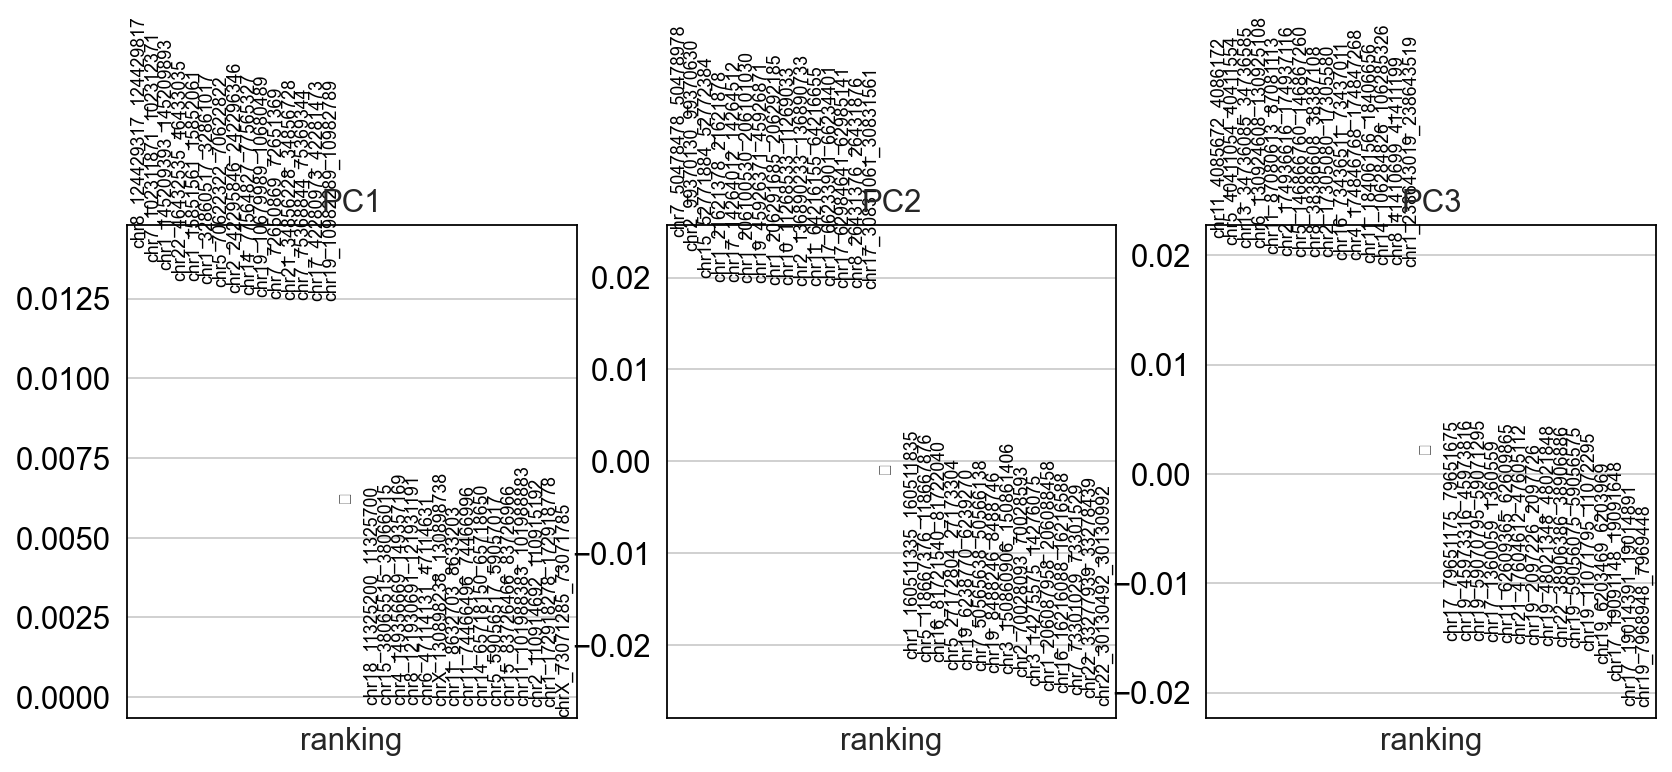

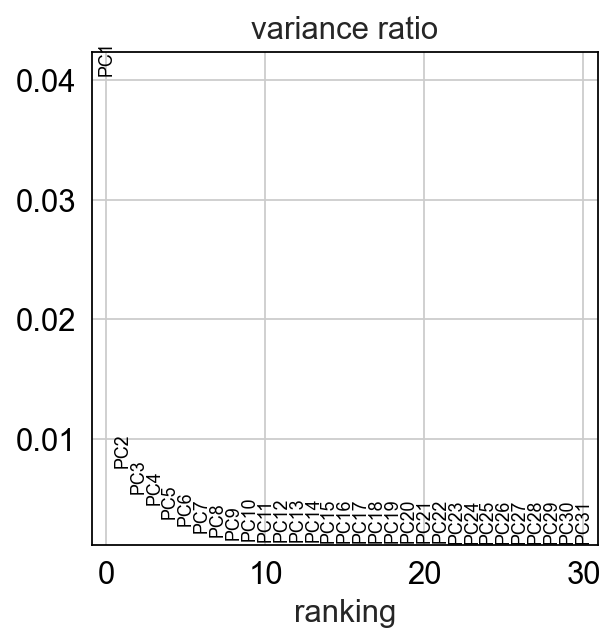

In [52]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')
epi.pl.pca_overview(adata, color=['nb_features', 'cell_type'])

In [53]:
"""
`epi.pp.lazy()` is a function in the episcanpy library that is used to 
 load image data into memory in a lazy, or on-demand, manner. 
 This can be useful when working with large image datasets that cannot fit into memory, 
 as it allows you to access only the data you need, when you need it, 
 rather than having to load the entire dataset into memory. 
 
 The function returns a "lazy version" of the input data, 
 which can then be used in other episcanpy functions for processing and analysis.
"""
epi.pp.lazy(adata)

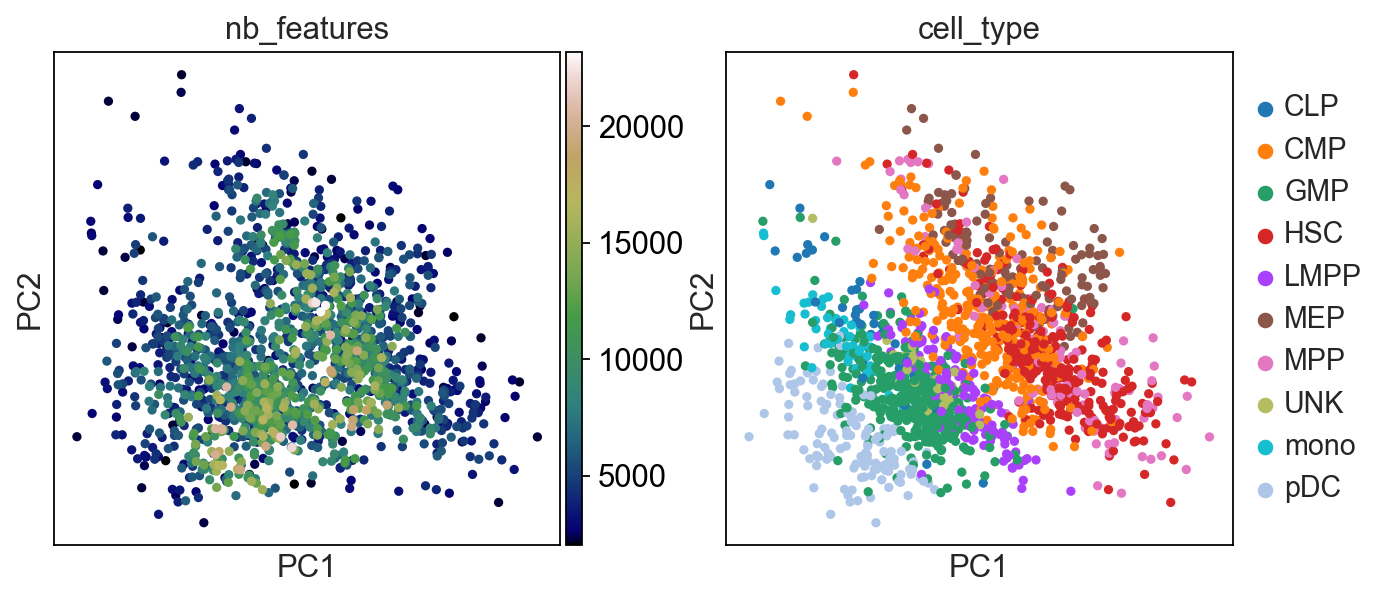

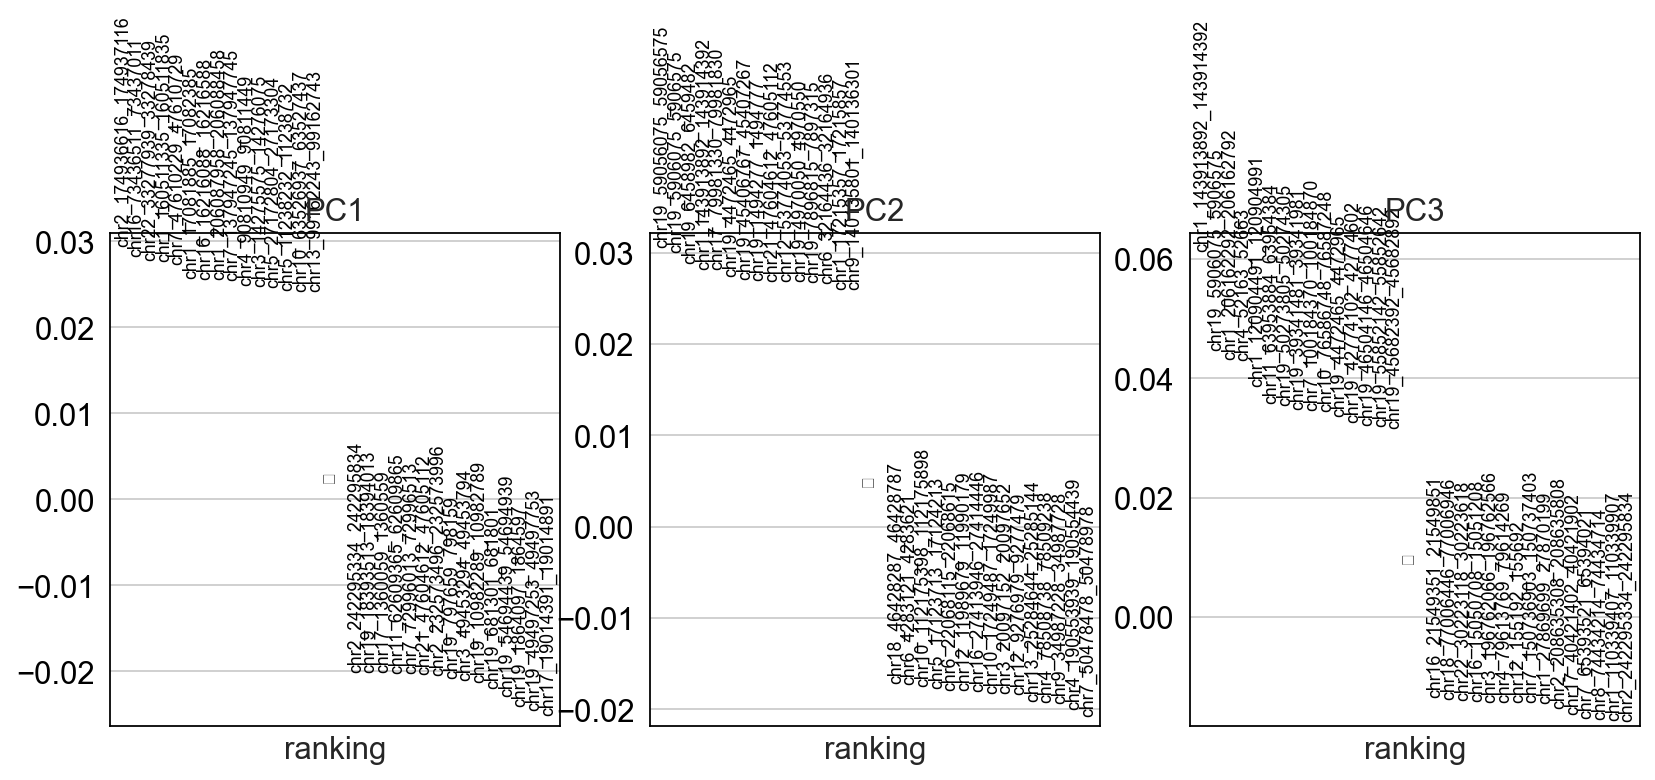

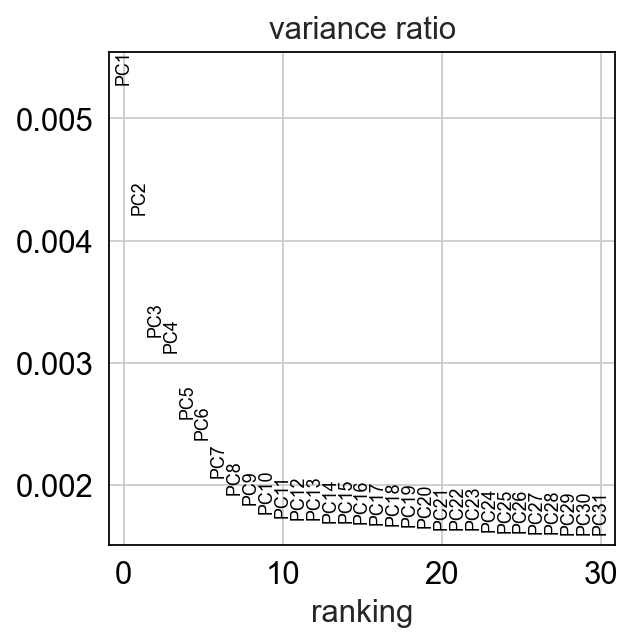

In [54]:
epi.pl.pca_overview(adata, color=['nb_features', 'cell_type'])

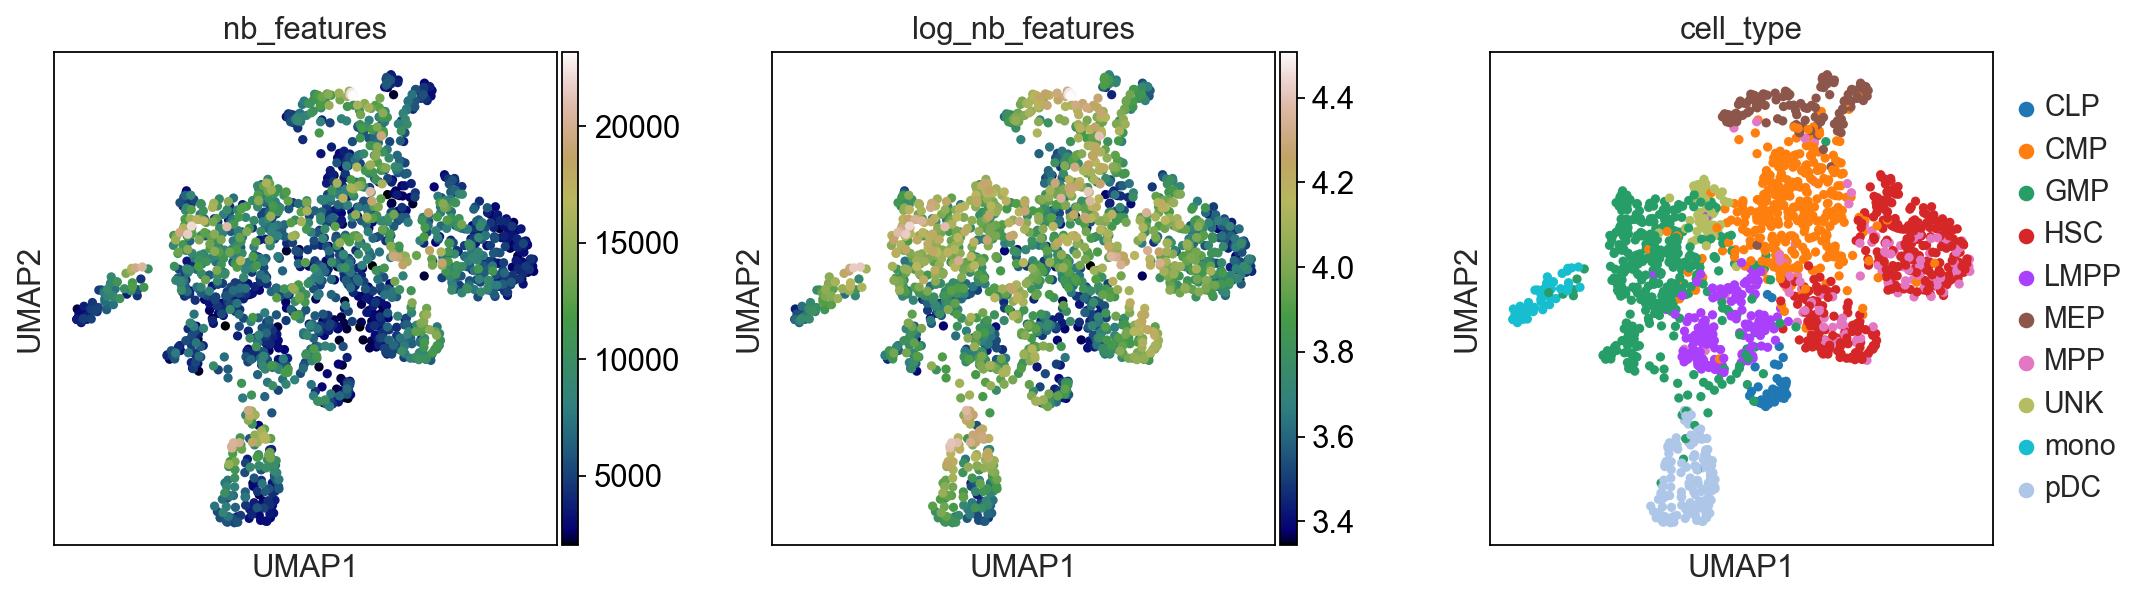

In [55]:
epi.pl.umap(adata, color=['nb_features', 'log_nb_features', 'cell_type'], wspace=0.3)

------------
#### Log Transform

This isn't a mandatory step. 

It really depends of the dataset. Here, the number of features recovered per cell vary greatly. 

Thus, it benefits from a log transformation after normalisation.

------------

In [56]:
epi.pp.log1p(adata)

In [57]:
epi.pp.lazy(adata)

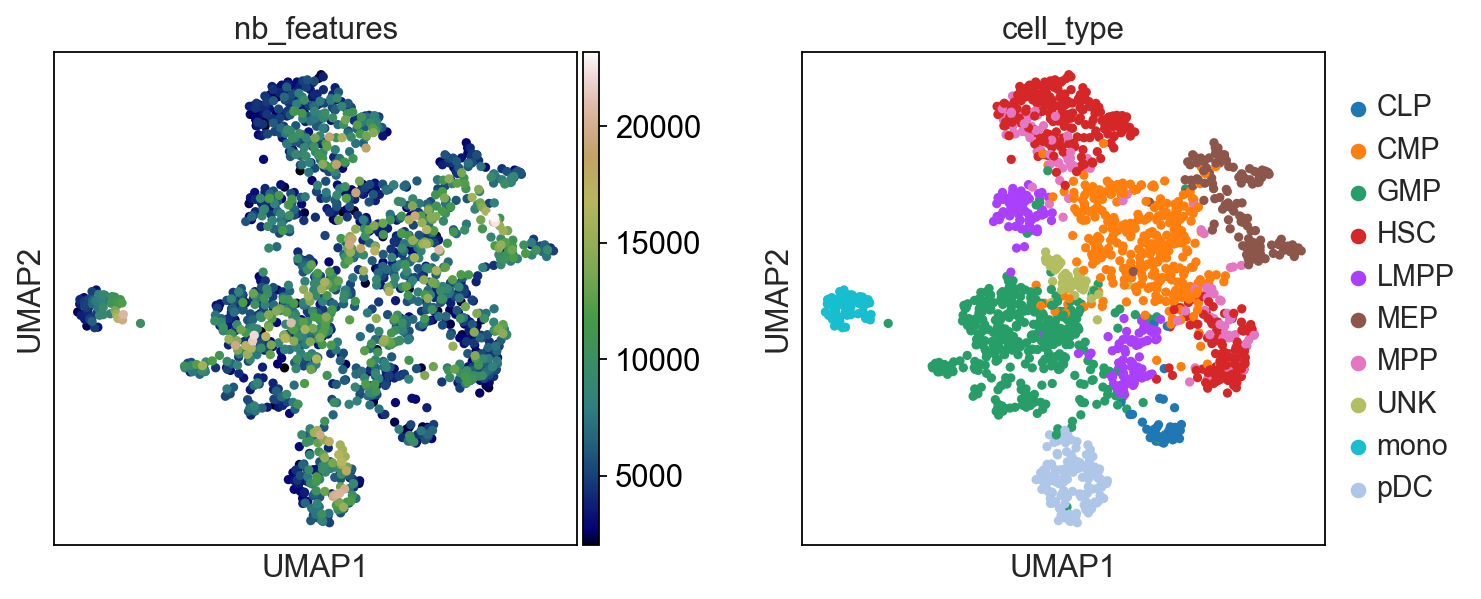

In [58]:
epi.pl.umap(adata, color=['nb_features', 'cell_type'], wspace=0.3)

----------------------

### CLUSTERING

----------------------

--------------
#### Louvain Clustering
--------------

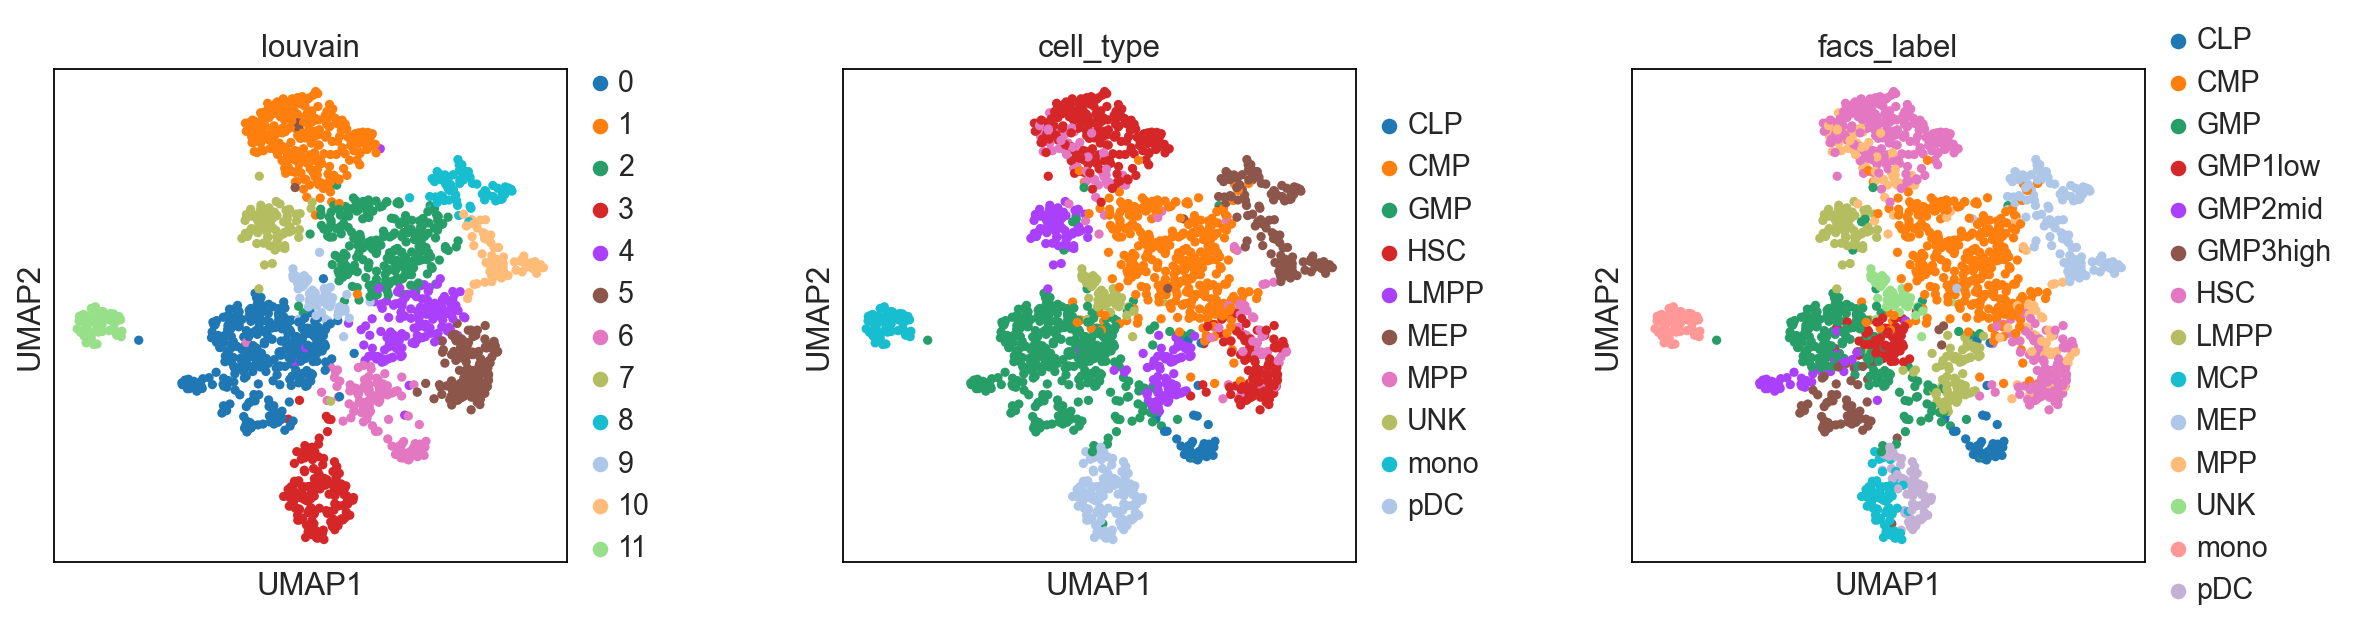

In [59]:
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain', 'cell_type', 'facs_label'], 
            wspace=0.4)

In [60]:
epi.tl.getNClusters(adata, n_cluster=14)

step 0
got 17 at resolution 1.5
step 1
got 11 at resolution 0.75
step 2
got 12 at resolution 1.125
step 3
got 15 at resolution 1.3125
step 4
got 15 at resolution 1.21875
step 5
got 15 at resolution 1.171875
step 6
got 13 at resolution 1.1484375
step 7
got 14 at resolution 1.16015625


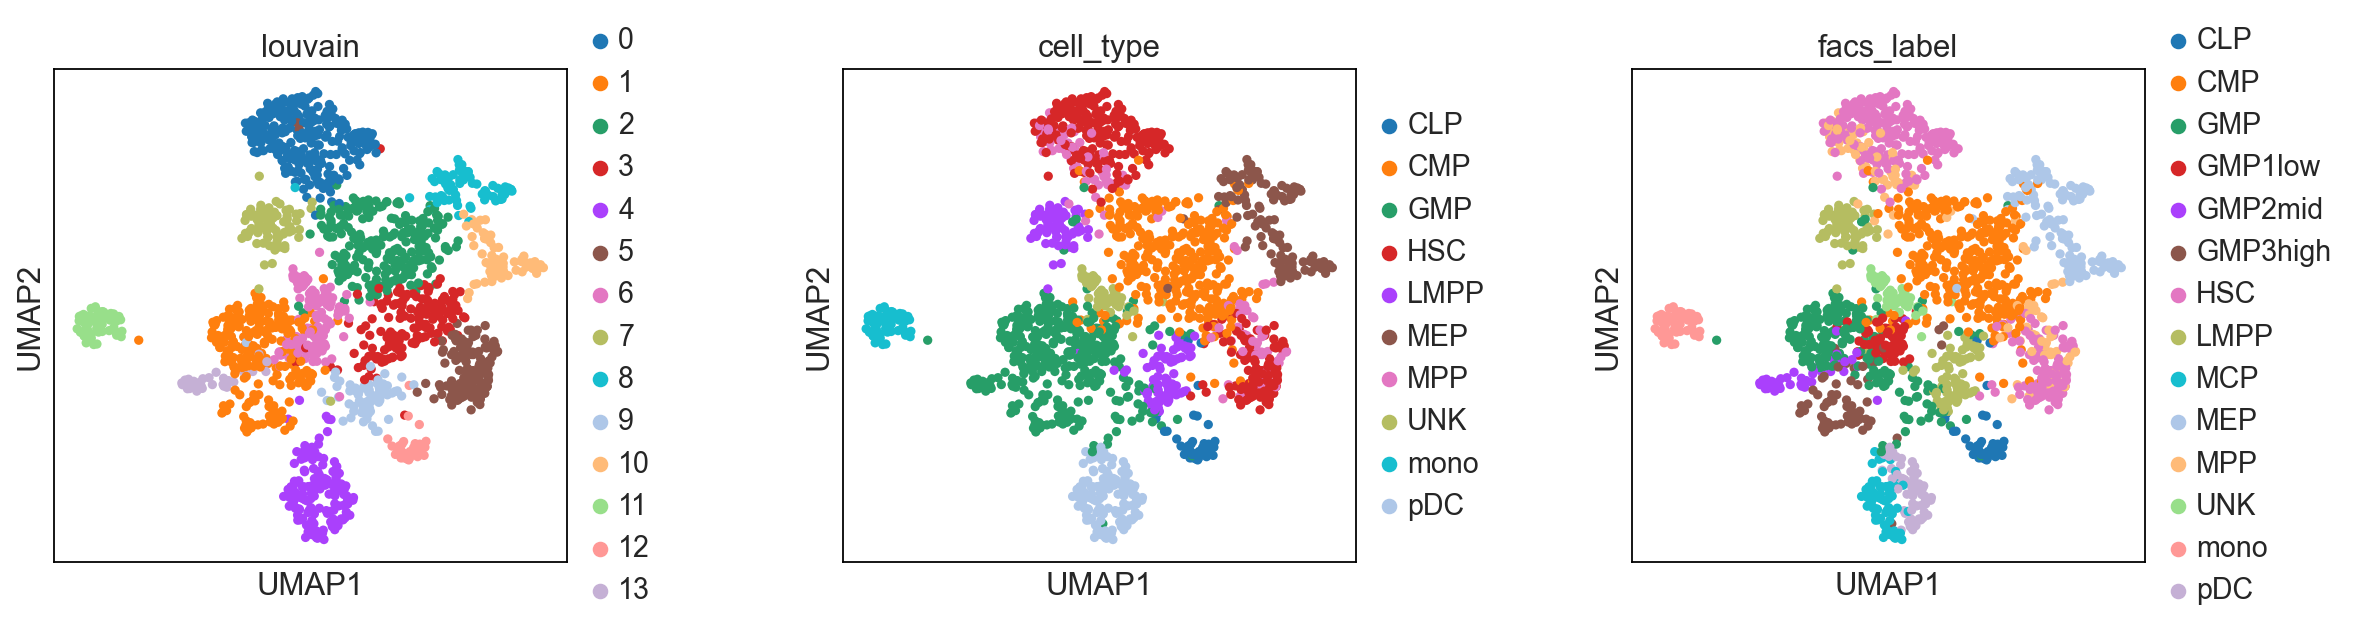

In [61]:
epi.pl.umap(adata, color=['louvain', 'cell_type', 'facs_label'], 
            wspace=0.4)

--------------
#### KMeans Clustering
--------------

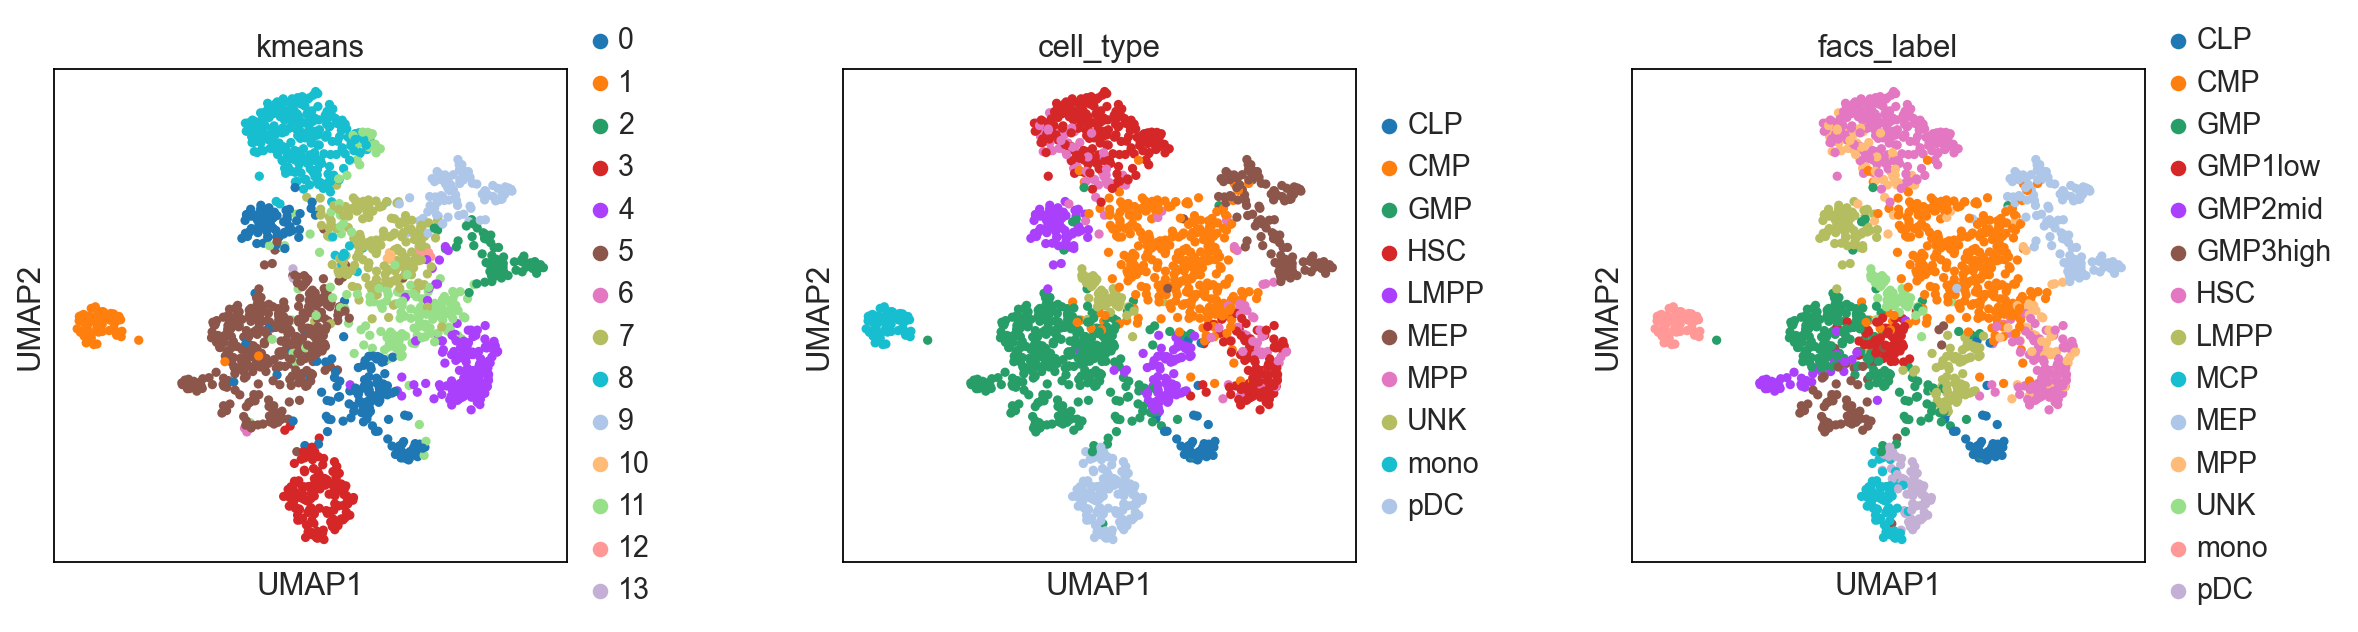

In [62]:
epi.tl.kmeans(adata, num_clusters=14)
epi.pl.umap(adata, color=['kmeans', 'cell_type', 'facs_label'], wspace=0.4)

--------------
#### Heirarchical Clustering
--------------

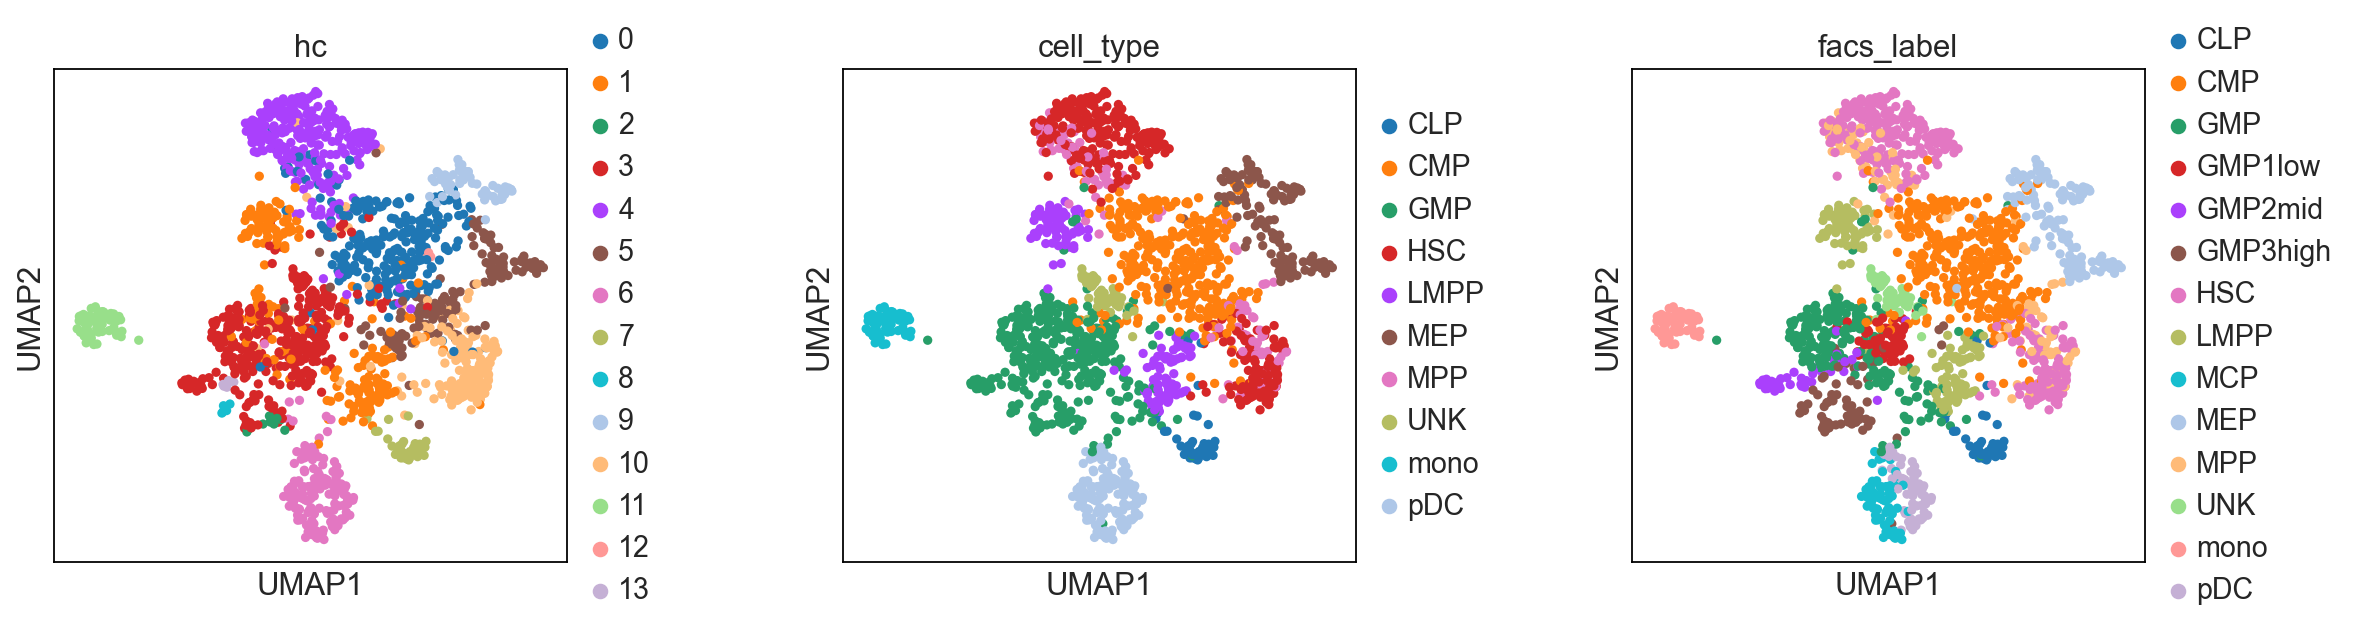

In [63]:
epi.tl.hc(adata, num_clusters=14)
epi.pl.umap(adata, color=['hc', 'cell_type', 'facs_label'], wspace=0.4)

--------------
#### Leiden Clustering
--------------

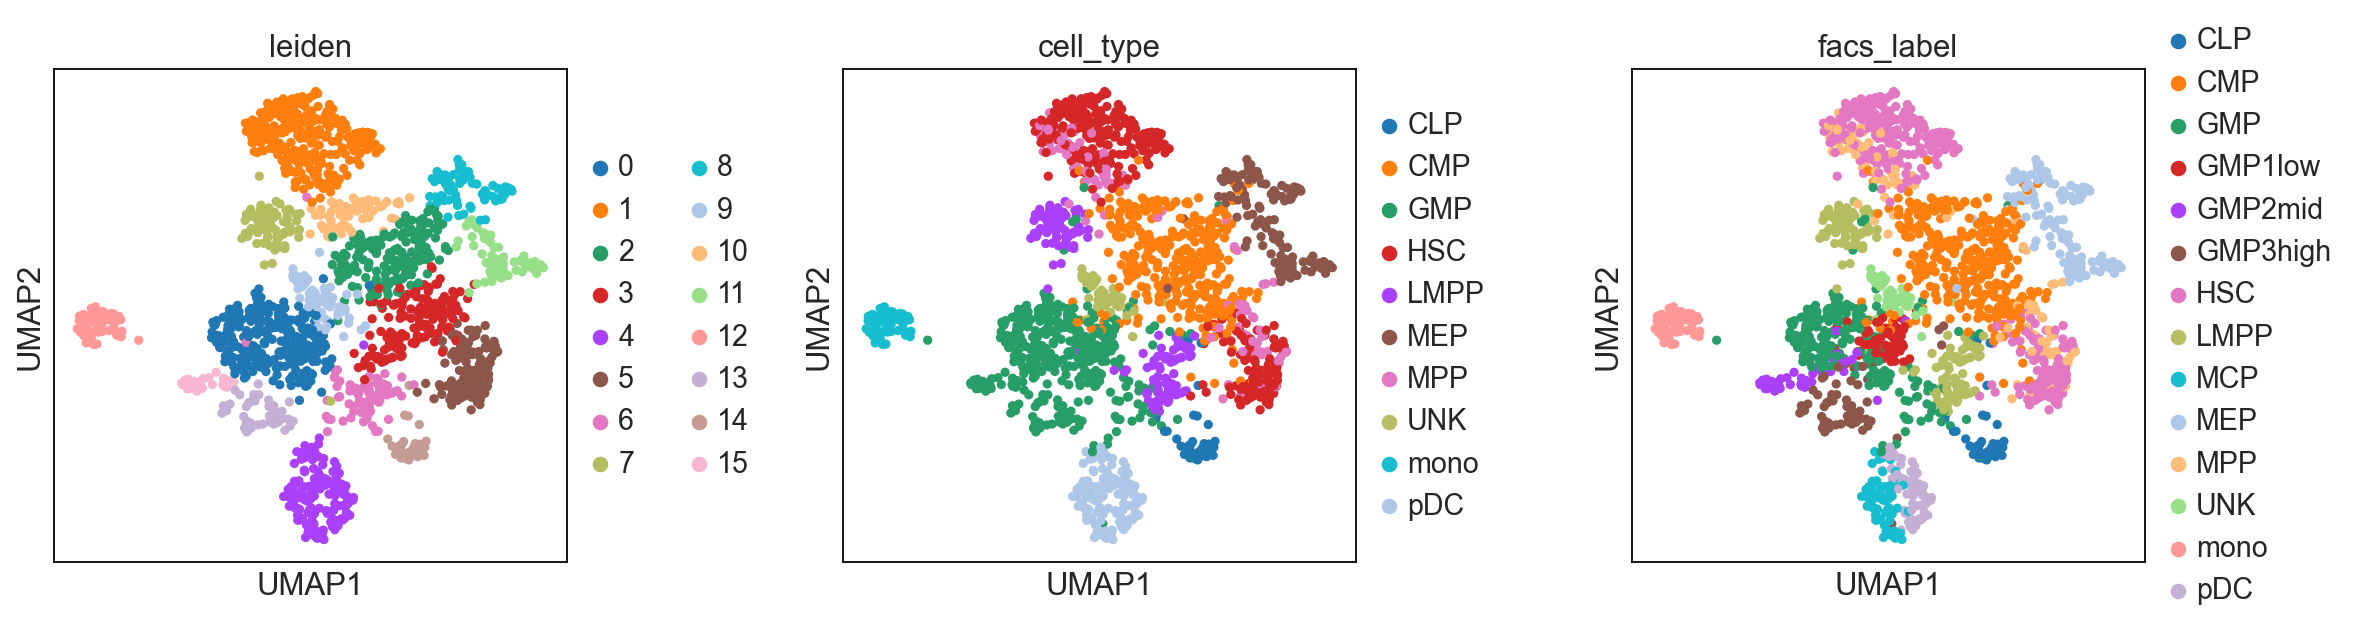

In [64]:
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['leiden', 'cell_type', 'facs_label'], wspace=0.4)

In [65]:
epi.tl.getNClusters(adata, n_cluster=14, method='leiden')

step 0
got 20 at resolution 1.5
step 1
got 13 at resolution 0.75
step 2
got 16 at resolution 1.125
step 3
got 16 at resolution 0.9375
step 4
got 15 at resolution 0.84375
step 5
got 14 at resolution 0.796875


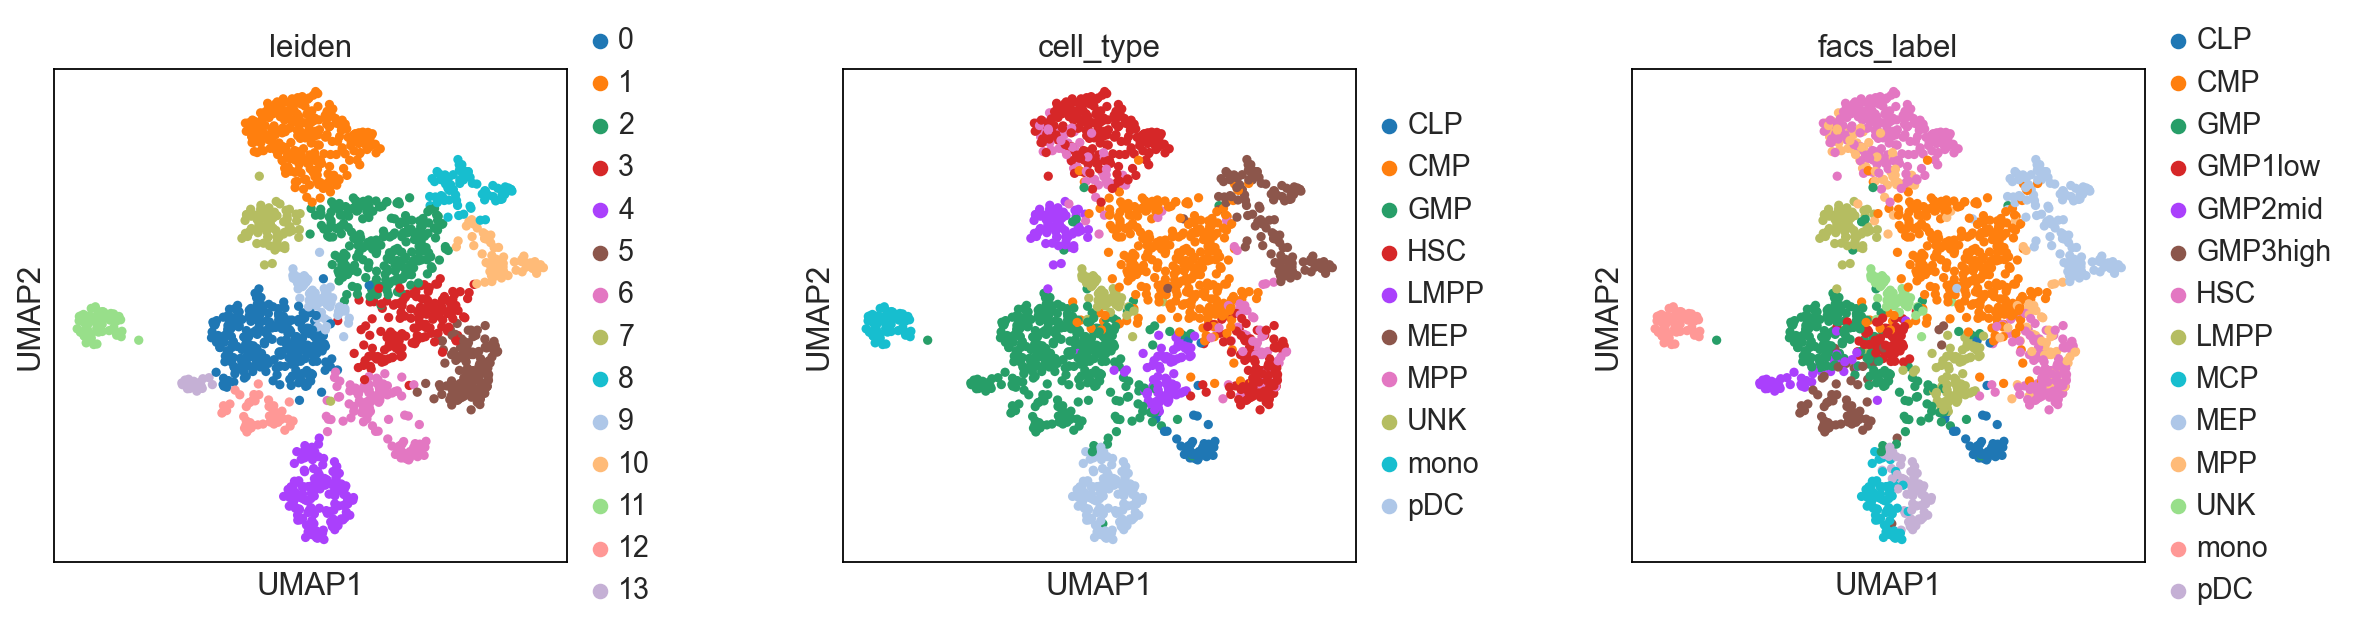

In [66]:
epi.pl.umap(adata, color=['leiden', 'cell_type', 'facs_label'], wspace=0.4)

-------------------
### Comparison between clustering algorithms

-------------------

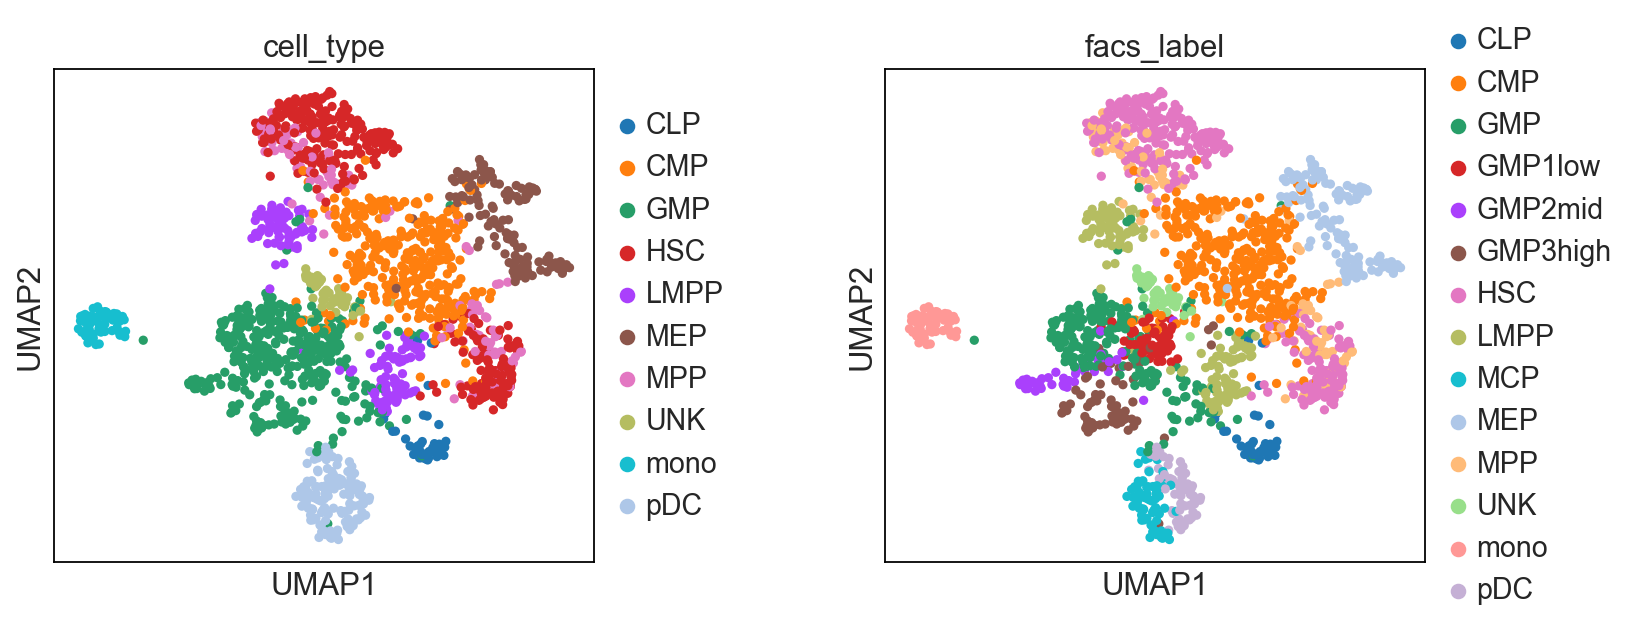

In [67]:
# True labels
epi.pl.umap(adata, color=['cell_type', 'facs_label'], wspace=0.4)

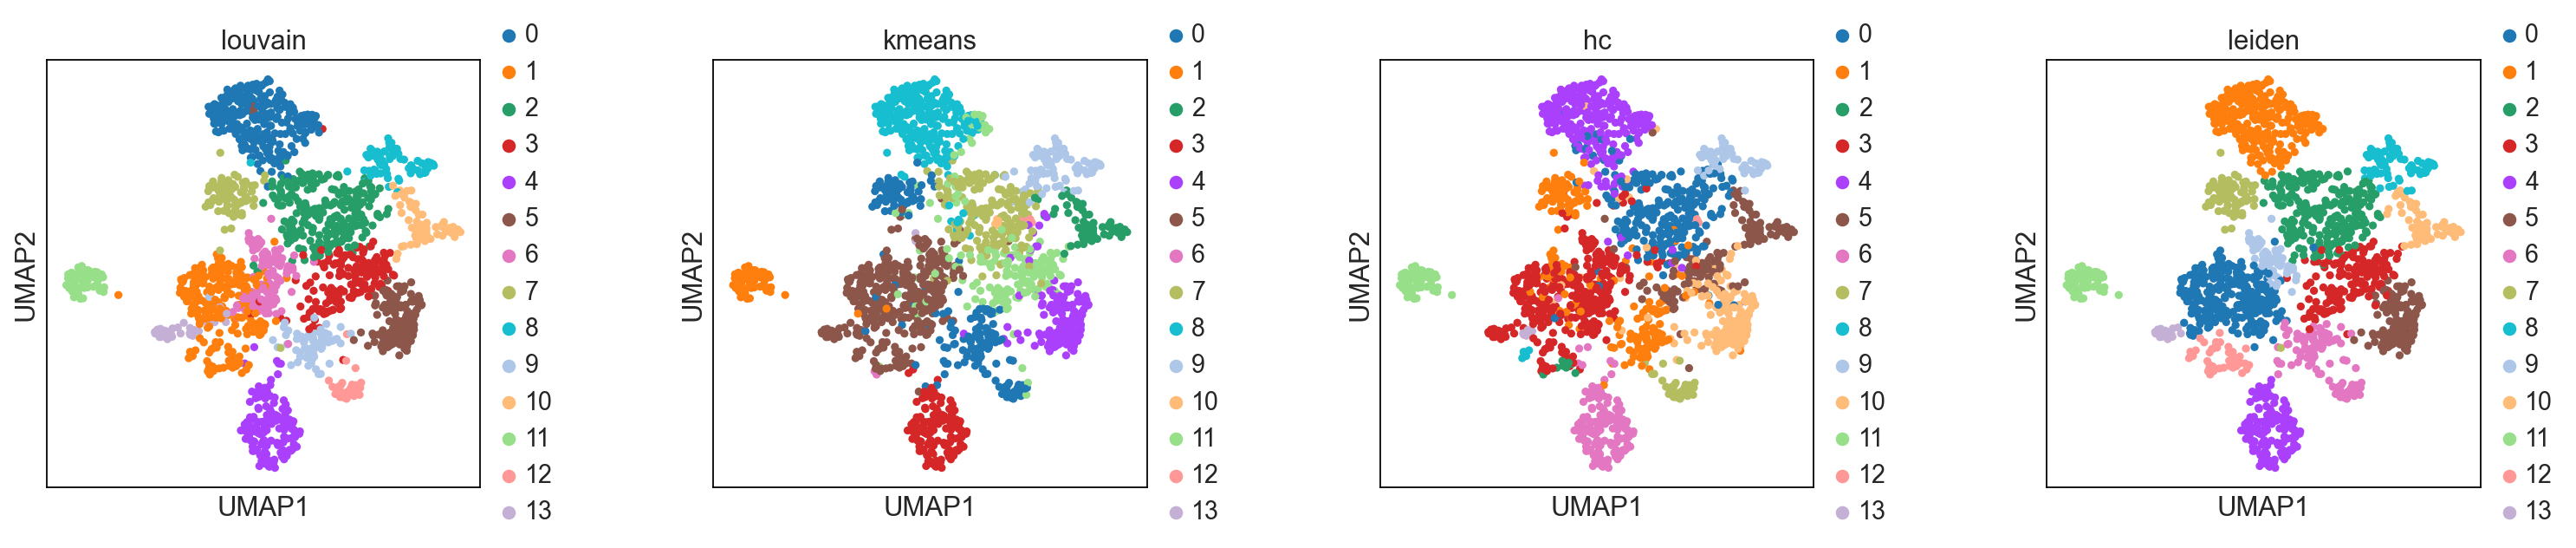

In [68]:
# Clusters
epi.pl.umap(adata, color=['louvain', 'kmeans', 'hc', 'leiden'], wspace=0.4)

#### A few metrics to compare the quality of the different clusterings.

**`For all these methods. The best value possible is 1.`**

------------------

#### 1) Adjusted Rand Index

------------------

Compute the Adjusted Rand Index for the different clustering to determine which one perform best. 

It computes a similarity measure between two clusterings (predicted and true labels)by counting cells that are assigned in the same or different clusters between the two clusterings.

----------------------

In [71]:
print('louvain:            ', epi.tl.ARI(adata, 'louvain', 'cell_type'))
print('kmeans:             ', epi.tl.ARI(adata, 'kmeans', 'cell_type'))
print('Heirarchical:       ', epi.tl.ARI(adata, 'hc', 'cell_type'))
print('leiden:             ', epi.tl.ARI(adata, 'leiden', 'cell_type'))

louvain:             0.5203177525200191
kmeans:              0.5087835909940323
Heirarchical:        0.48531062578856293
leiden:              0.5566277622582093


------------------

#### 2) Homogeneity Score

------------------

The score is higher when the different clusters contain only cells with the same ground truth label

In [72]:
print('louvain:       ', epi.tl.homogeneity(adata, 'louvain', 'cell_type'))
print('kmeans:        ', epi.tl.homogeneity(adata, 'kmeans', 'cell_type'))
print('Heirarchical:  ', epi.tl.homogeneity(adata, 'hc', 'cell_type'))
print('leiden:        ', epi.tl.homogeneity(adata, 'leiden', 'cell_type'))

louvain:        0.6223859660968886
kmeans:         0.6146746655712314
Heirarchical:   0.5954779531553356
leiden:         0.640902717535929


------------------

#### 3) Adjusted Mutual Information

------------------

It is measure of the similarity between two labels of the same data, while accounting for chance (the Mutual information is generally higher for two set of labels with a large number of clusters)

In [73]:
print('louvain:           ', epi.tl.AMI(adata, 'louvain', 'cell_type'))
print('kmeans:            ', epi.tl.AMI(adata, 'kmeans', 'cell_type'))
print('heirarchical:      ', epi.tl.AMI(adata, 'hc', 'cell_type'))
print('leiden:            ', epi.tl.AMI(adata, 'leiden', 'cell_type'))

louvain:            0.6704704842431494
kmeans:             0.6295371304119183
heirarchical:       0.606175654407119
leiden:             0.6881262933553942


--------------------------

In [75]:
# Saving the Processed AnnData
#
adata.write('episcanpy_results.h5ad')


--------------

## Differential Chromatin Analysis

--------------

In [76]:
# Reading the Results file
# ------------------------
adata = ad.read('episcanpy_results.h5ad')
adata

AnnData object with n_obs × n_vars = 1722 × 122505
    obs: 'batch', 'cell_name', 'facs_label', 'label', 'cell_type', 'nb_features', 'log_nb_features', 'louvain', 'kmeans', 'hc', 'leiden'
    var: 'transcript_annotation', 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'cell_type_colors', 'facs_label_colors', 'hc_colors', 'kmeans_colors', 'leiden', 'leiden_colors', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'connectivities', 'distances'

In [79]:
# epi.tl.rank_features(adata, 'louvain', omic='ATAC')
# epi.pl.rank_feat_groups(adata)

In [81]:
# epi.pl.rank_feat_groups(adata, feature_symbols='transcript_annotation')

In [ ]:
# epi.pl.rank_feat_groups_matrixplot(adata)